In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("../data/parsed_logs_rad.csv")

In [37]:
configs = dict(
    # Baseline C100
    BaseC100="c100_res44_test_01_bn-relu_base.yaml",
    # "c100_res44_test_02_bn-relu6.yaml",
    # Order inversion with relu6 C100
    OrderInvC100="c100_res44_test_02_relu6-bn.yaml",
    # "c100_res44_test_02_bn-relu6_base.yaml",
    BaseBnRelu6C100="c100_res44_test_02_bn-relu6_base.yaml",
    BnRelu6C100="c100_res44_test_02_bn-relu6.yaml",
    # Order inversion + nan filter + Relu6
    OrderINanRelu6C100="c100_res44_test_02_relu6-bn_nanfilter.yaml",
    # Gelu and nan C100
    GeluNanC100="c100_res44_test_02_gelu6_nans.yaml",

    # Baseline C10
    BaseC10="c10_res44_test_01_bn-relu_base.yaml",
    # "c10_res44_test_02_bn-relu6.yaml",
    BnRelu6C10="c10_res44_test_02_bn-relu6.yaml",
    # Order inversion with relu6 C10
    OrderInvC10="c10_res44_test_02_relu6-bn.yaml",
    # "c10_res44_test_02_bn-relu6_base.yaml",
    BaseBnRelu6C10="c10_res44_test_02_bn-relu6_base.yaml",
    OrderINanRelu6C10="c10_res44_test_02_relu6-bn_nanfilter.yaml",
    # Gelu and nan C10
    GeluNanC10="c10_res44_test_02_gelu6_nans.yaml",

    MobileNetC100="cifar100_mobilenetv2_x1_4.yaml",
    MobileNetC10="cifar10_mobilenetv2_x1_4.yaml",

    Resnet50ImagenetBase="resnet50_imagenet1k_v2_base",
    # Resnet50ImagenetBase="resnet50_imagenet1k_v2_base",
    DeepLabV3="deeplabv3_resnet50_base",
    resnet50d="resnet50d",
    ViTPatch16_224="vit_base_patch16_224",
    ViTPatch16_384="vit_base_patch16_384",
    ViTPatchSam32_224="vit_base_patch32_224_sam",
    ViTPatch32_384="vit_base_patch32_384",
    ViTPatch14Huge_224="vit_huge_patch14_clip_224.laion2b_ft_in12k_in1k",
    ViTPatch14Huge_336="vit_huge_patch14_clip_336.laion2b_ft_in12k_in1k",
    ViTPatch14Large_224="vit_large_patch14_clip_224.laion2b_ft_in12k_in1k",
    VitPatch32Base="vit_base_patch32_224.sam"
)
configs_inv = {v.replace(".yaml", ""): k for k, v in configs.items()}

In [38]:
df["config"] = df["config"].apply(lambda x: configs_inv[x])

In [39]:
df

,start_dt,config,ecc,hostname,logfile,batch_size,it,ker_time,acc_time,ker_err,acc_err,sdc,critical_sdc,evil_sdc,benign_sdc
0,2023-05-16 02:38:55,ViTPatch16_384,ON,carola20002,2023_05_16_02_38_55_vit_base_patch16_384_ECC_O...,4,438,0.133452,59.256430,4,4,1,0,0,0
1,2023-05-16 09:48:14,ViTPatch14Huge_224,OFF,carola20002,2023_05_16_09_48_14_vit_huge_patch14_clip_224....,4,1,0.741480,0.000000,4,4,1,0,0,0
2,2023-05-16 09:48:14,ViTPatch14Huge_224,OFF,carola20002,2023_05_16_09_48_14_vit_huge_patch14_clip_224....,4,2,0.383738,1.125218,4,8,1,0,0,0
3,2023-05-16 07:47:39,ViTPatch16_224,ON,carola20002,2023_05_16_07_47_39_vit_base_patch16_224_ECC_O...,4,211,0.054124,12.532556,4,4,1,0,0,0
4,2023-05-16 10:27:21,ViTPatch14Huge_224,OFF,carola20002,2023_05_16_10_27_21_vit_huge_patch14_clip_224....,4,7,0.397862,3.134569,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30355,2023-05-16 07:14:57,BaseC100,OFF,carola20003,2023_05_16_07_14_57_c100_res44_test_01_bn-relu...,128,2403,0.011722,0.000000,100,8715,1,0,0,0
30356,2023-05-16 07:14:57,BaseC100,OFF,carola20003,2023_05_16_07_14_57_c100_res44_test_01_bn-relu...,128,2404,0.011661,29.267036,100,8815,1,0,0,0
30357,2023-05-15 20:11:58,OrderINanRelu6C100,OFF,carola20003,2023_05_15_20_11_58_c100_res44_test_02_relu6-b...,128,72,0.015124,0.000000,46,46,1,0,0,0
30358,2023-05-15 20:11:58,OrderINanRelu6C100,OFF,carola20003,2023_05_15_20_11_58_c100_res44_test_02_relu6-b...,128,546,0.015098,0.000000,33,79,1,0,0,0


In [40]:
df["correct_predictions"] =  df["batch_size"] - df["evil_sdc"]

In [41]:
df["totally_correct"] = ((df["evil_sdc"] == 0) & (df["critical_sdc"] == 1)).astype(int)

In [42]:
to_save = df.groupby(["hostname", "config", "ecc"]).agg({"batch_size": max, "acc_time": sum, "sdc": sum, "critical_sdc": sum})

In [43]:
to_save["sdc_error_rate"] = to_save["sdc"] / to_save["acc_time"]
to_save["critical_error_rate"] = to_save["critical_sdc"] / to_save["acc_time"]


In [50]:
to_save[["sdc", "acc_time", "critical_sdc", "sdc_error_rate", "critical_error_rate"]]

sdc      acc_time  critical_sdc  \
hostname    config              ecc                                      
carola20002 BaseC100            ON     215  17942.086588            18   
            OrderINanRelu6C100  ON     100   5403.773136             9   
            ViTPatch14Huge_224  OFF    107   1334.849541             4   
            ViTPatch16_224      OFF     91     89.115445             0   
                                ON      29   1827.770344             0   
            ViTPatch16_384      ON      27   1181.031775             1   
carola20003 BaseC100            OFF  12491  18631.419863           202   
                                ON     378   6913.763399           258   
            OrderINanRelu6C100  OFF  12178  33029.103325            31   
                                ON      45   3249.106270             1   
carolp20001 ViTPatch14Huge_224  OFF   1085   7719.361133             8   
            ViTPatch14Huge_336  OFF     55   7131.781894             5   
            ViTPatch14Large_224 OFF     60   9247.758949             7   
            ViTPatch16_224      OFF    130   9986.304597             7   
            ViTPatch16_384      OFF     38   3358.579137             4   
            VitPatch32Base      OFF      4    756.437097             1   
            resnet50d           OFF      7    869.919105             3   

                                     sdc_error_rate  critical_error_rate  
hostname    config              ecc                                       
carola20002 BaseC100            ON         0.011983             0.001003  
            OrderINanRelu6C100  ON         0.018506             0.001666  
            ViTPatch14Huge_224  OFF        0.080159             0.002997  
            ViTPatch16_224      OFF        1.021147             0.000000  
                                ON         0.015866             0.000000  
            ViTPatch16_384      ON         0.022861             0.000847  
carola20003 BaseC100            OFF        0.670427             0.010842  
                                ON         0.054674             0.037317  
            OrderINanRelu6C100  OFF        0.368705             0.000939  
                                ON         0.013850             0.000308  
carolp20001 ViTPatch14Huge_224  OFF        0.140556             0.001036  
            ViTPatch14Huge_336  OFF        0.007712             0.000701  
            ViTPatch14Large_224 OFF        0.006488             0.000757  
            ViTPatch16_224      OFF        0.013018             0.000701  
            ViTPatch16_384      OFF        0.011314             0.001191  
            VitPatch32Base      OFF        0.005288             0.001322  
            resnet50d           OFF        0.008047             0.003449

In [45]:
to_save = to_save.drop(pd.IndexSlice["carola20003", "BaseBnRelu6C100", "OFF"])

<AxesSubplot: ylabel='hostname,config,ecc'>

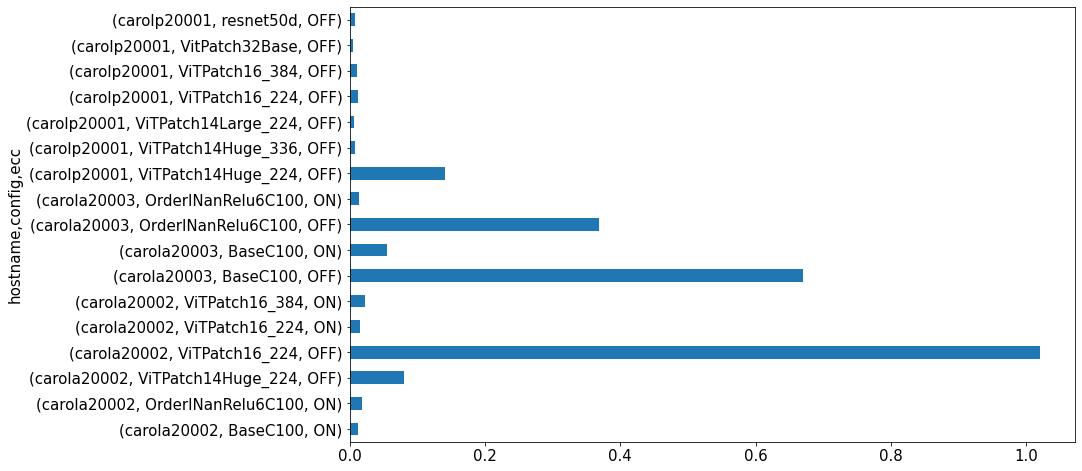

In [46]:
plt.figure(figsize=(13,8))
plt.rcParams.update({'font.size': 15})
to_save["sdc_error_rate"].plot.barh()

<AxesSubplot: ylabel='hostname,config,ecc'>

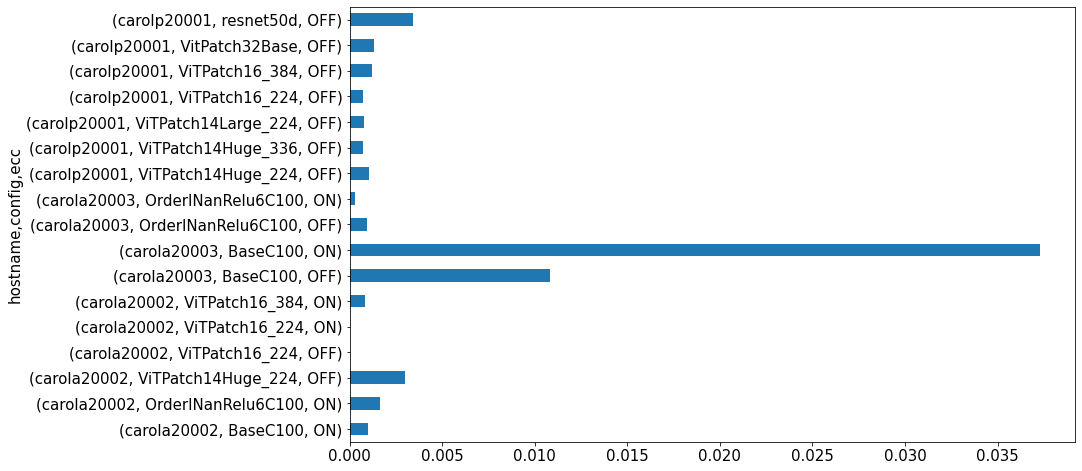

In [47]:
plt.figure(figsize=(13,8))
plt.rcParams.update({'font.size': 15})
to_save["critical_error_rate"].plot.barh()